Get zenodo_get to grab data from zenodo

In [ ]:
!pip install zenodo_get

Grab the data of the third observing run

In [ ]:
!zenodo_get 8177023

Title: GWTC-3: Compact Binary Coalescences Observed by LIGO and Virgo During the Second Part of the Third Observing Run — Parameter estimation data release
Keywords: 
Publication date: 2023-10-23
DOI: 10.5281/zenodo.8177023
Total size: 23.6 GB

Link: https://zenodo.org/records/8177023/files/IGWN-GWTC3p0-v2-GW191204_171526_PEDataRelease_mixed_nocosmo.h5   size: 547.6 MB

Checksum is correct. (51f6f0c318045469659629e71a4f5235)

Link: https://zenodo.org/records/8177023/files/IGWN-GWTC3p0-v2-GW191216_213338_PEDataRelease_mixed_nocosmo.h5   size: 786.8 MB

Checksum is correct. (db39e680c42562facbca6b7fb757155c)

Link: https://zenodo.org/records/8177023/files/IGWN-GWTC3p0-v2-GW191129_134029_PEDataRelease_mixed_nocosmo.h5   size: 397.8 MB

Checksum is correct. (836c02b6e84b5fbb83ba0d2740c670ec)

Link: https://zenodo.org/records/8177023/files/IGWN-GWTC3p0-v2-GW191127_050227_PEDataRelease_mixed_nocosmo.h5   size: 581.9 MB

Checksum is correct. (77b8ccd47650bc39266209e82b7863b8)

Link: https://z

Install the LIGO pesummary which allows us to read the data files.

BIG WARNING:
It seems installing this breaks importing certain packages. I install it on google colab, then restart the runtime and just import the neccessary packages. This gets it to works. Why? I have no idea.

In [ ]:
!source ~/virtualenvs/pesummary_py3.8/bin/activate
!python -m pip install pesummary
import pesummary
print(pesummary.__version__)

/bin/bash: line 1: /root/virtualenvs/pesummary_py3.8/bin/activate: No such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.8 MB/s eta 0:00:00
 

Import all packages needed

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import pandas as pd
import os
from google.colab import drive
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings

warnings.filterwarnings('ignore')
import pesummary

from pesummary.io import read
print(pesummary.__version__)
import h5py

from pesummary.utils.utils import logger
import logging
logger.setLevel(logging.CRITICAL)


1.3.4


In [ ]:
#ras=np.array([])
#decs=[]
#times=[]


Grab data. We only want files with that are associated with mixed comsos. Then we read all files and grab the parameters we need which are right ascension, declination, and geocentric time. We also create weights associated with each parameter estimation. This is used for creating contours later on. We create a big array with values from each event, and finally create a dataframe that holds all the parameters.
Note: One event does not have a geocentric time associated with it, we will deal with this troublesome individual later in the code.

In [ ]:
ras=np.array([])
decs=np.array([])
times=np.array([])
weights=np.array([])


for file in os.listdir('/content/'):
 if file.endswith('mixed_cosmo.h5'):
  print(file)
  data = read(file)
  samples_dict = data.samples_dict
  try:
   posterior_samples = samples_dict['C01:Mixed']
  except:
   posterior_samples = samples_dict['C01:IMRPhenomPv2_NRTidal:HighSpin']
  try:
   ra=posterior_samples['ra']
   dec=posterior_samples['dec']
   time=posterior_samples['geocent_time']
   weight=np.ones_like(ra)/len(ra)
   ras=np.concatenate([ras,ra])
   decs=np.concatenate([decs,dec])
   times=np.concatenate([times,time])
   weights=np.concatenate([weights,weight])
   print('done with ' + str(file))
  except:
    for keys in posterior_samples.keys():
      print(keys)

 else:
  continue

df=pd.DataFrame({'ra':ras,'dec':decs,'times':times,'weights':weights})#'time':times,


IGWN-GWTC3p0-v2-GW200128_022011_PEDataRelease_mixed_cosmo.h5
done with IGWN-GWTC3p0-v2-GW200128_022011_PEDataRelease_mixed_cosmo.h5
IGWN-GWTC3p0-v2-GW191113_071753_PEDataRelease_mixed_cosmo.h5
done with IGWN-GWTC3p0-v2-GW191113_071753_PEDataRelease_mixed_cosmo.h5
IGWN-GWTC3p0-v2-GW200105_162426_PEDataRelease_mixed_cosmo.h5
done with IGWN-GWTC3p0-v2-GW200105_162426_PEDataRelease_mixed_cosmo.h5
IGWN-GWTC3p0-v2-GW191216_213338_PEDataRelease_mixed_cosmo.h5
done with IGWN-GWTC3p0-v2-GW191216_213338_PEDataRelease_mixed_cosmo.h5
IGWN-GWTC3p0-v2-GW191204_110529_PEDataRelease_mixed_cosmo.h5
done with IGWN-GWTC3p0-v2-GW191204_110529_PEDataRelease_mixed_cosmo.h5
IGWN-GWTC3p0-v2-GW200224_222234_PEDataRelease_mixed_cosmo.h5
done with IGWN-GWTC3p0-v2-GW200224_222234_PEDataRelease_mixed_cosmo.h5
IGWN-GWTC3p0-v2-GW200115_042309_PEDataRelease_mixed_cosmo.h5
done with IGWN-GWTC3p0-v2-GW200115_042309_PEDataRelease_mixed_cosmo.h5
IGWN-GWTC3p0-v2-GW200302_015811_PEDataRelease_mixed_cosmo.h5
done with IGWN-

Mount the drive so that we are able to save the data file of the third run.

In [ ]:
drive.mount('/content/drive')
df.to_csv('/content/drive/MyDrive/PHYS 549/GW3data.csv', index=False)

Mounted at /content/drive


NameError: name 'df' is not defined

Plot third run to see what it looks like.

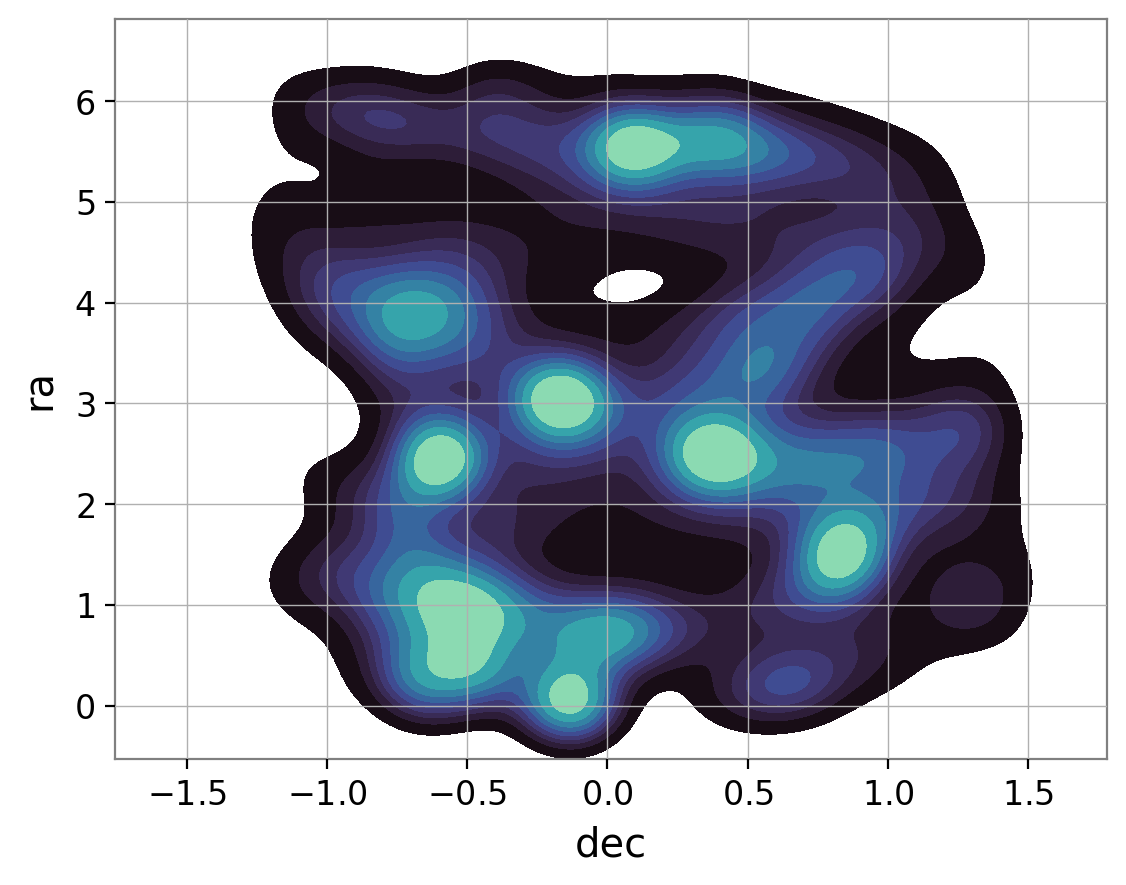

In [ ]:
sb.kdeplot(data=df, x="dec", y="ra", cmap="mako", weights='weights',fill=True)
plt.show()

This is dealing with the troublesome individual. We repeat the process of getting the code but manually put in the geocentric time.

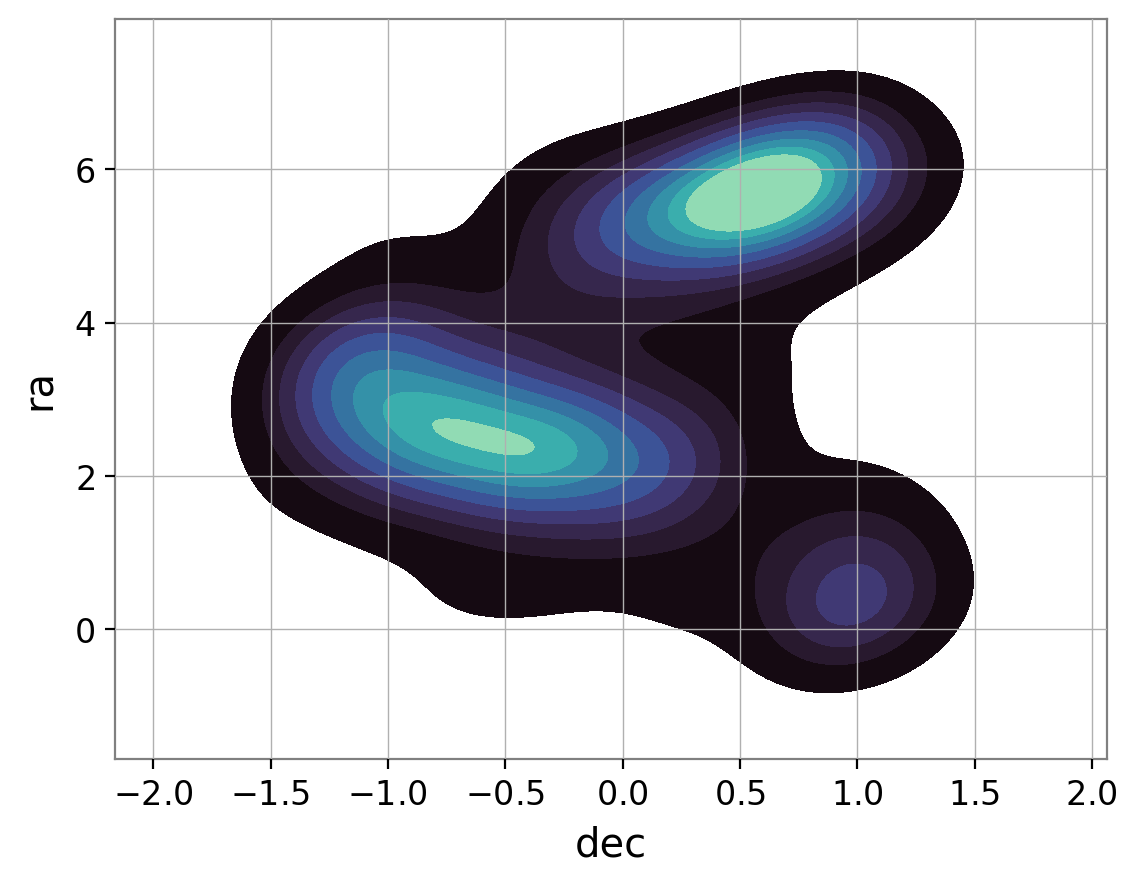

In [ ]:
data = read('/content/IGWN-GWTC3p0-v2-GW200308_173609_PEDataRelease_mixed_cosmo.h5')
samples_dict = data.samples_dict
posterior_samples = samples_dict['C01:Mixed']
#posterior_samples = samples_dict['C01:IMRPhenomPv2_NRTidal:HighSpin']
ra=posterior_samples['ra']
dec=posterior_samples['dec']
weight=np.ones_like(ra)/len(ra)
time=np.ones_like(ra)*1.26772419e+09
gw200308=pd.DataFrame({'ra':ra,'dec':dec,'times':time,'weights':weight})
gw200308.to_csv('/content/drive/MyDrive/PHYS 549/GW200308.csv', index=False)
sb.kdeplot(data=gw200308, x="dec", y="ra", cmap="mako", weights='weights',fill=True)
plt.show()